# Gradient Boosting

In [1]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd
from joblib import dump
import matplotlib.pyplot as plt
import numpy as np

In [37]:
import sys
sys.path.append('F:\\Users\\Manuel García Plaza\\Desktop\\TFG\\')

In [38]:
from notebooks.utils.classification_metrics import classification

In [2]:
train =  pd.read_parquet('../../../data/model_input/train_sets/breast_cancer.parquet')
validation =  pd.read_parquet('../../../data/model_input/validation_sets/breast_cancer.parquet')

In [3]:
y_train = train.diagnosis
X_train = train.drop(columns=['diagnosis'])

In [4]:
y_validation = validation.diagnosis
X_validation = validation.drop(columns=['diagnosis'])

In [7]:
exploratory_depths =[2, 3, 4, 5]
exploratory_estimators = [10, 25, 50, 75, 100, 200]
exploratory_learn_rate = [0.01, 0.05, 0.1, 0.5]

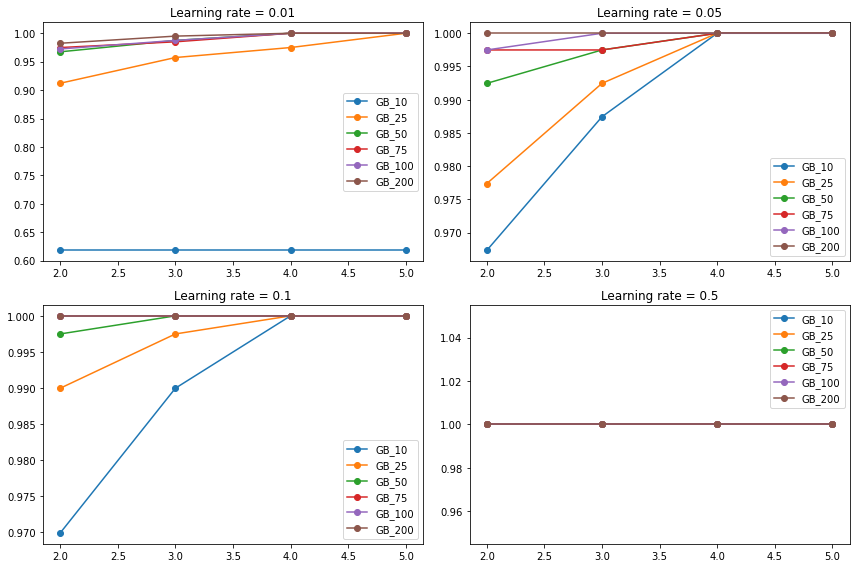

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for n in exploratory_estimators:
    axs[0, 0].plot(exploratory_depths, [GradientBoostingClassifier(n_estimators=n, max_depth=i, learning_rate=exploratory_learn_rate[0]).fit(X_train, y_train).score(X_train, y_train) for i in exploratory_depths], 
             marker= 'o', label='GB_'+str(n))
    axs[0, 1].plot(exploratory_depths, [GradientBoostingClassifier(n_estimators=n, max_depth=i, learning_rate=exploratory_learn_rate[1]).fit(X_train, y_train).score(X_train, y_train) for i in exploratory_depths], 
             marker= 'o', label='GB_'+str(n))
    axs[1, 0].plot(exploratory_depths, [GradientBoostingClassifier(n_estimators=n, max_depth=i, learning_rate=exploratory_learn_rate[2]).fit(X_train, y_train).score(X_train, y_train) for i in exploratory_depths], 
             marker= 'o', label='GB_'+str(n))
    axs[1, 1].plot(exploratory_depths, [GradientBoostingClassifier(n_estimators=n, max_depth=i, learning_rate=exploratory_learn_rate[3]).fit(X_train, y_train).score(X_train, y_train) for i in exploratory_depths], 
             marker= 'o', label='GB_'+str(n))
    
axs[0, 0].set_title('Learning rate = '+str(exploratory_learn_rate[0]))
axs[0, 0].legend()
axs[0, 1].set_title('Learning rate = '+str(exploratory_learn_rate[1]))
axs[0, 1].legend()
axs[1, 0].set_title('Learning rate = '+str(exploratory_learn_rate[2]))
axs[1, 0].legend()
axs[1, 1].set_title('Learning rate = '+str(exploratory_learn_rate[3]))
axs[1, 1].legend()

plt.tight_layout()
plt.show()

In [42]:
max_depth = [2, 3, 4, 5]
n_estimators = [50, 100, 150, 200, 250, 300, 350]
learn_rate = [0.01, 0.05, 0.1, 0.2]

In [43]:
models_list = []
names_list = []
for n in n_estimators:
    for d in max_depth:
        for l in learn_rate:
            models_list.append(GradientBoostingClassifier(n_estimators=n, max_depth=d, learning_rate=l))
            names_list.append('GB_'+str(n)+'_'+str(d)+'_'+str(l))

In [44]:
metrics = classification(models_list, names_list, '../../../data/model_output/metrics/breast_cancer/gradient_boosting.csv', X_train, y_train, X_validation, y_validation, metrics={})
metrics

,Run_Time,Train_AUC,Validation_AUC,delta%
GB_50_2_0.01,0.235411,0.994103,0.957080,-3.724243
GB_50_2_0.05,0.230394,0.998930,0.961466,-3.750421
GB_50_2_0.1,0.241355,1.000000,0.976817,-2.318296
GB_50_2_0.2,0.233395,1.000000,0.978697,-2.130326
GB_50_3_0.01,0.337584,0.998797,0.954261,-4.458954
...,...,...,...,...
GB_350_4_0.2,0.899163,1.000000,0.951754,-4.824561
GB_350_5_0.01,2.744720,1.000000,0.910401,-8.959900
GB_350_5_0.05,2.403171,1.000000,0.919799,-8.020050
GB_350_5_0.1,1.306119,1.000000,0.956140,-4.385965


In [45]:
metrics[metrics['delta%']>-10].sort_values(by='Validation_AUC', ascending=False)

,Run_Time,Train_AUC,Validation_AUC,delta%
GB_150_3_0.2,1.117298,1.0,0.996867,-0.313283
GB_300_3_0.1,2.190341,1.0,0.995614,-0.438596
GB_200_3_0.2,1.289931,1.0,0.995614,-0.438596
GB_100_3_0.2,0.644449,1.0,0.995614,-0.438596
GB_250_3_0.2,1.563844,1.0,0.993734,-0.626566
...,...,...,...,...
GB_100_4_0.01,0.855438,1.0,0.912281,-8.771930
GB_150_5_0.1,1.097974,1.0,0.910401,-8.959900
GB_100_5_0.1,0.794197,1.0,0.910401,-8.959900
GB_350_5_0.01,2.744720,1.0,0.910401,-8.959900


We choose **GB_150_3_0.2**.

In [5]:
test = pd.read_parquet('../../../data/model_input/test_sets/breast_cancer.parquet')

In [6]:
y_test = test.diagnosis
X_test = test.drop(columns=['diagnosis'])

In [7]:
retrain = pd.concat([train, validation])

In [8]:
y_retrain = retrain.diagnosis
X_retrain = retrain.drop(columns=['diagnosis'])

In [31]:
model = GradientBoostingClassifier(n_estimators=150, max_depth=3, learning_rate=0.2).fit(X_retrain, y_retrain)

In [32]:
test_pred = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, test_pred)
print('Test AUC:', round(auc, 4))

Test AUC: 0.985


In [34]:
dump(model, '../../../data/model_output/models/breast_cancer/best_gradient_boosting.joblib')

['best_gradient_boosting.joblib']

In [35]:
with open('../../../data/model_output/metrics/breast_cancer/final_AUC.txt', 'a') as f:
    f.write('\nGB, '+ str(auc))

In [9]:
from joblib import load
load_mod = load('../../../data/model_output/models/breast_cancer/best_gradient_boosting.joblib')

In [10]:
train_pred = load_mod.predict_proba(X_retrain)[:, 1]
auc_train = roc_auc_score(y_retrain, train_pred)
test_pred = load_mod.predict_proba(X_test)[:, 1]
auc_test = roc_auc_score(y_test, test_pred)

In [11]:
import time 
time1 = time.time()
GradientBoostingClassifier(n_estimators=150, max_depth=3, learning_rate=0.2).fit(X_retrain, y_retrain)
time2 = time.time() - time1 

In [12]:
with open('../../../data/model_output/metrics/breast_cancer/final_metrics.txt', 'a') as f:
     f.write(f'\nGB; {time2}; {auc_train}; {auc_test}')